In [71]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sukritchatterjee/used-cars-dataset-cardekho")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'used-cars-dataset-cardekho' dataset.
Path to dataset files: /kaggle/input/used-cars-dataset-cardekho


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
import os
print(os.listdir(path))
df=pd.read_csv(path+"/cars_details_merges.csv")

['cars_data_clean.csv', 'cars_details_merges.csv', 'feature_dictionary.csv']


/tmp/ipython-input-1220140914.py:3: DtypeWarning: Columns (25,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path+"/cars_details_merges.csv")


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37814 entries, 0 to 37813
Columns: 140 entries, position to Ground Clearance Unladen
dtypes: bool(3), float64(10), int64(28), object(99)
memory usage: 39.6+ MB


In [75]:
df.isna().sum()

,0
position,0
loc,5851
myear,0
bt,19
tt,0
...,...
experiment,0
Fuel Suppy System,5502
Compression Ratio,27642
Alloy Wheel Size,13146


In [76]:
df.duplicated().sum()

np.int64(0)

In [77]:
df.describe()

,position,myear,ip,imgCount,modelId,centralVariantId,discountValue,msp,pageNo,views,...,city_id_new,max_engine_capacity_new,km_driven,used_carid,dealer_id,model_year,dynx_itemid_y,dynx_itemid2_y,dynx_totalvalue_y,min_engine_capacity_new
count,37814.000000,37814.000000,37814.000000,37814.000000,37814.000000,37814.000000,37814.000000,3.781400e+04,37814.000000,37814.000000,...,37814.000000,37761.000000,3.781400e+04,3.781400e+04,37814.0,37814.000000,3.781400e+04,37814.000000,3.781400e+04,37761.000000
mean,12.786349,2015.569472,0.010208,15.571005,813.535516,4244.333131,73.279764,5.426562e+01,76.330433,313.440736,...,176.556963,1438.638542,6.240934e+04,3.350110e+06,0.0,2015.569472,3.350110e+06,4244.126884,7.999081e+05,1438.638542
std,4.538626,3.779047,0.100518,8.358341,908.223696,2456.207209,2805.746196,7.477465e+03,34.703450,512.066193,...,162.452402,470.559461,5.847148e+04,4.822178e+04,0.0,3.779047,4.822178e+04,2456.445823,3.042944e+06,470.559461
min,1.000000,1983.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000e+00,2.000000,0.000000,...,2.000000,0.000000,1.010000e+02,2.123741e+06,0.0,1983.000000,2.123741e+06,3.000000,1.196300e+04,0.000000
25%,9.000000,2013.000000,0.000000,10.000000,262.000000,1689.000000,0.000000,0.000000e+00,55.000000,69.000000,...,66.000000,1197.000000,3.173950e+04,3.323254e+06,0.0,2013.000000,3.323254e+06,1682.000000,3.200000e+05,1197.000000
50%,13.000000,2016.000000,0.000000,15.000000,582.000000,4191.000000,0.000000,0.000000e+00,69.000000,166.000000,...,152.000000,1248.000000,5.672600e+04,3.366214e+06,0.0,2016.000000,3.366214e+06,4191.000000,5.250000e+05,1248.000000
75%,17.000000,2018.000000,0.000000,21.000000,834.000000,6373.000000,0.000000,0.000000e+00,100.000000,364.000000,...,243.000000,1582.000000,8.330775e+04,3.384768e+06,0.0,2018.000000,3.384768e+06,6373.000000,8.556565e+05,1582.000000
max,20.000000,2023.000000,1.000000,74.000000,3417.000000,9670.000000,200000.000000,1.093000e+06,163.000000,21102.000000,...,1721.000000,6749.000000,6.300000e+06,3.399050e+06,0.0,2023.000000,3.399050e+06,9670.000000,5.500006e+08,6749.000000


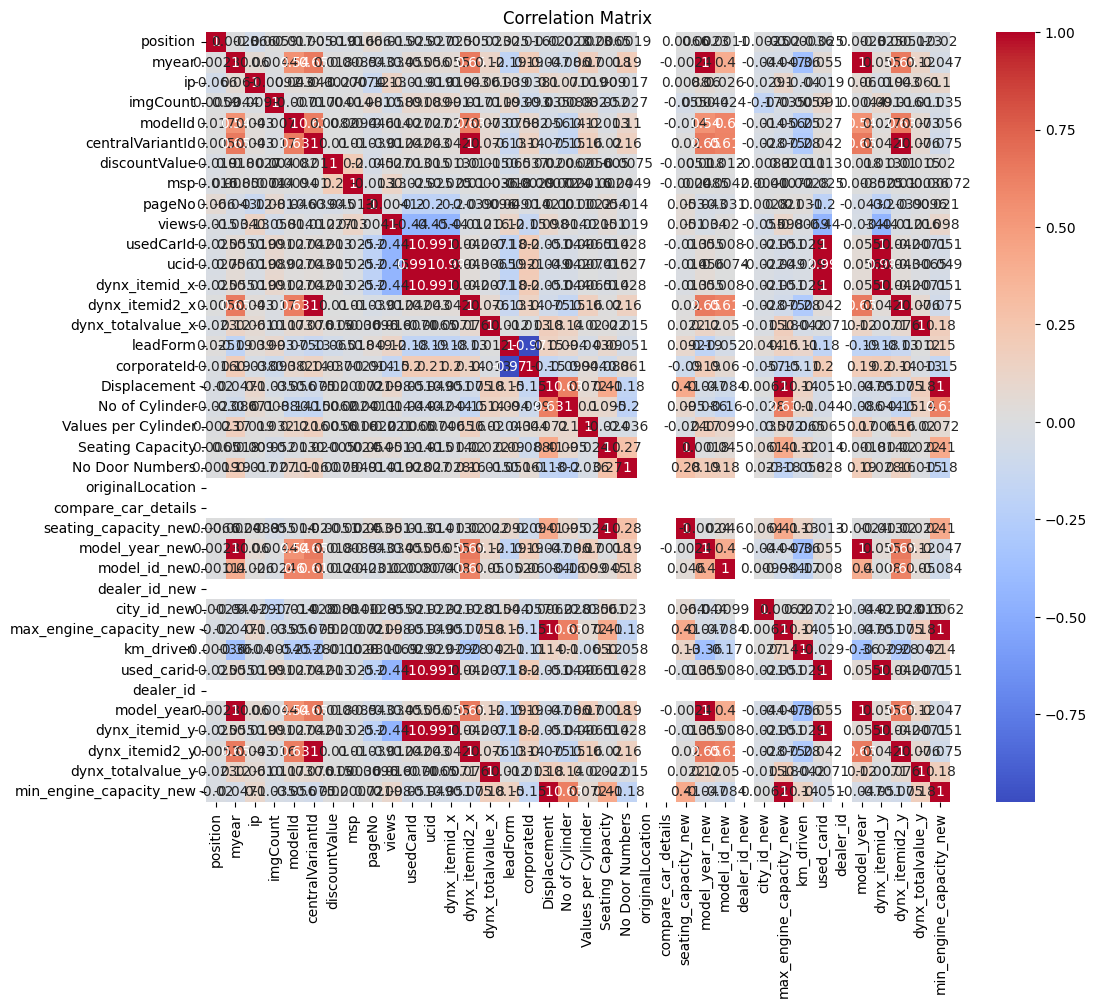

In [78]:
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [79]:
df.columns

Index(['position', 'loc', 'myear', 'bt', 'tt', 'ft', 'km', 'ip', 'pi',
       'images',
       ...
       'owner_type', 'price_segment_new', 'template_name_new', 'page_template',
       'template_Type_new', 'experiment', 'Fuel Suppy System',
       'Compression Ratio', 'Alloy Wheel Size', 'Ground Clearance Unladen'],
      dtype='object', length=140)

In [80]:
drop_cols = [
    'images', 'template_name_new', 'page_template',
    'template_Type_new', 'experiment', 'position', 'loc'
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])


In [81]:
df.columns

Index(['myear', 'bt', 'tt', 'ft', 'km', 'ip', 'pi', 'imgCount', 'threesixty',
       'dvn',
       ...
       'brand_new', 'variant_new', 'exterior_color', 'min_engine_capacity_new',
       'owner_type', 'price_segment_new', 'Fuel Suppy System',
       'Compression Ratio', 'Alloy Wheel Size', 'Ground Clearance Unladen'],
      dtype='object', length=133)

In [82]:
num_features = [
    'myear',        # Manufacturing year
    'km',           # Kilometers driven
    'ip',           # Engine power
    'pi',           # Power indicator
    'imgCount',     # Listing quality proxy
    'threesixty',   # 360 view availability
    'Compression Ratio',
    'Ground Clearance Unladen',
    'min_engine_capacity_new'
]


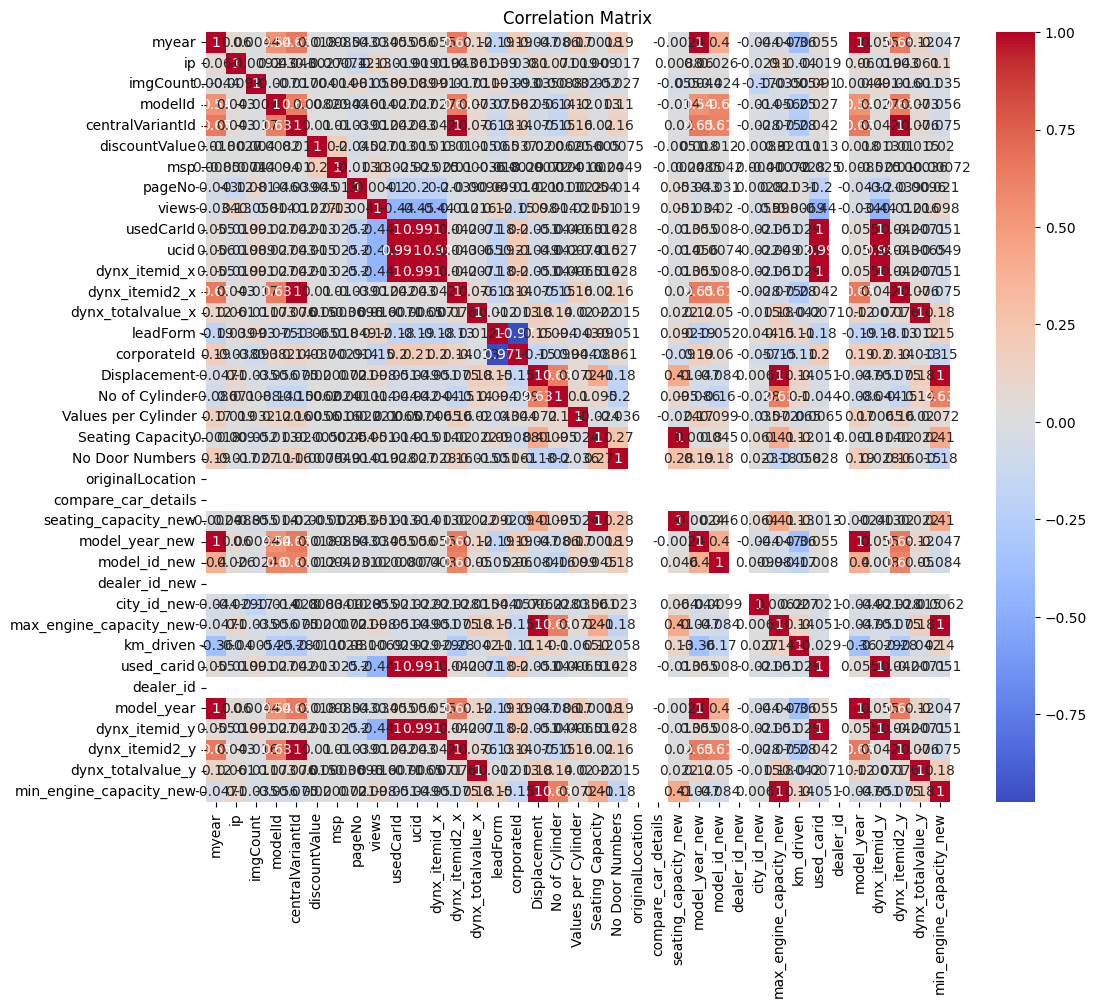

In [83]:
plt.figure(figsize=(12,10))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix")
plt.show()


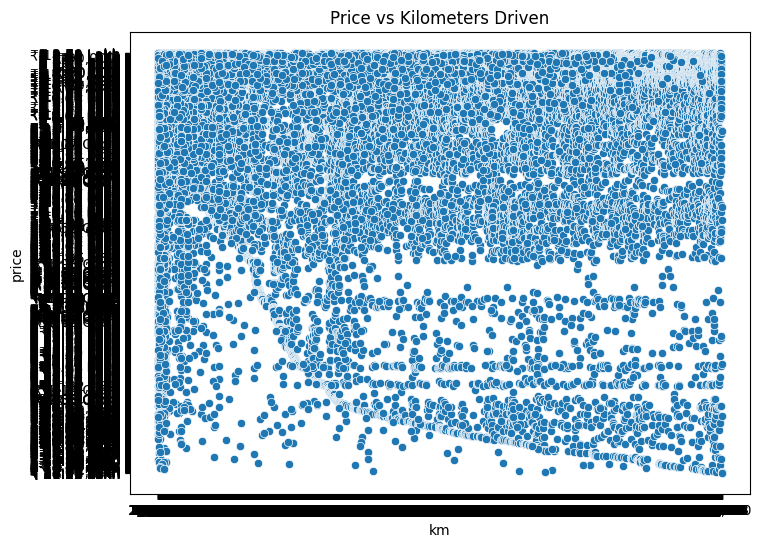

In [84]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['km'], y=df['price'])
plt.title("Price vs Kilometers Driven")
plt.show()


In [85]:
df.shape


(37814, 133)

In [86]:
df[['price', 'km', 'myear']].describe()


,myear
count,37814.000000
mean,2015.569472
std,3.779047
min,1983.000000
25%,2013.000000
50%,2016.000000
75%,2018.000000
max,2023.000000


In [88]:
df.head()

,myear,bt,tt,ft,km,ip,pi,imgCount,threesixty,dvn,...,brand_new,variant_new,exterior_color,min_engine_capacity_new,owner_type,price_segment_new,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen
0,2016,Hatchback,Manual,CNG,"69,162",0,https://images10.gaadi.com/usedcar_image/origi...,15,False,Maruti Wagon R LXI CNG,...,maruti,maruti wagon r lxi cng,Silver,998.0,first,2lakh-5lakh,NaN,NaN,NaN,NaN
1,2015,Hatchback,Manual,CNG,"45,864",0,https://images10.gaadi.com/usedcar_image/origi...,15,False,Maruti Celerio Green VXI,...,maruti,maruti celerio green vxi,Grey,998.0,first,2lakh-5lakh,Intelligent-Gas Port Injection,11.0:1,NaN,NaN
2,2015,Sedan,Manual,CNG,"81,506",0,https://images10.gaadi.com/usedcar_image/origi...,15,False,Honda Amaze S Plus i-VTEC,...,honda,honda amaze s plus i-vtec,Silver,1198.0,second,2lakh-5lakh,NaN,NaN,NaN,NaN
3,2013,Hatchback,Manual,CNG,"1,15,893",0,NaN,0,False,Maruti Wagon R LXI CNG,...,maruti,maruti wagon r lxi cng,Silver,998.0,second,2lakh-5lakh,MPFI,NaN,13,NaN
4,2022,MUV,Manual,CNG,"18,900",0,https://images10.gaadi.com/usedcar_image/origi...,6,False,Maruti Ertiga VXI CNG,...,maruti,maruti ertiga vxi cng,White,1462.0,first,10+lakh,NaN,12.0+-.03,NaN,NaN


In [89]:
df = df.dropna(how='all')


In [90]:
df.shape

(37814, 133)

In [91]:
df = df.dropna(subset=['price', 'km', 'myear'])


In [93]:
df['km'] = (
    df['km']
    .astype(str)
    .str.replace(',', '', regex=True)
    .astype(float)
)


In [94]:
df['km'].dtype


dtype('float64')

In [95]:
drop_cols = [
    'ip',          # image URL
    'variant_new', # too granular
    'exterior_color',
    'price_segment_new'  # derived from price (data leakage!)
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

In [96]:
df = df.dropna(thresh=int(0.7 * df.shape[1]))


In [97]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [98]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('Unknown')


In [99]:
df[['myear', 'km']].describe()


,myear,km
count,37812.000000,3.781200e+04
mean,2015.570242,6.240959e+04
std,3.777486,5.847291e+04
min,1983.000000,1.010000e+02
25%,2013.000000,3.173875e+04
50%,2016.000000,5.672700e+04
75%,2018.000000,8.331075e+04
max,2023.000000,6.300000e+06


In [100]:
df.isnull().sum().sort_values(ascending=False).head(10)


,0
compare_car_details,37812
originalLocation,37812
myear,0
bt,0
tt,0
pi,0
imgCount,0
ft,0
km,0
oem,0


In [101]:
df = df.drop(columns=[
    'compare_car_details',
    'originalLocation'
])


In [102]:
df.isnull().sum().sort_values(ascending=False).head()


,0
myear,0
bt,0
tt,0
ft,0
km,0


In [104]:
print(df.columns)

Index(['myear', 'bt', 'tt', 'ft', 'km', 'pi', 'imgCount', 'threesixty', 'dvn',
       'oem',
       ...
       'dynx_itemid_y', 'dynx_itemid2_y', 'dynx_totalvalue_y', 'brand_new',
       'min_engine_capacity_new', 'owner_type', 'Fuel Suppy System',
       'Compression Ratio', 'Alloy Wheel Size', 'Ground Clearance Unladen'],
      dtype='object', length=127)


In [105]:
print(os.listdir(path))


['cars_data_clean.csv', 'cars_details_merges.csv', 'feature_dictionary.csv']


In [106]:
for file in os.listdir(path):
    if file.endswith('.csv'):
        temp = pd.read_csv(path + '/' + file, nrows=1)
        print(file, [c for c in temp.columns if 'price' in c.lower()])

cars_data_clean.csv ['listed_price']
cars_details_merges.csv ['price', 'priceSaving', 'price_range_segment', 'price_segment', 'price_segment_new']
feature_dictionary.csv []


In [107]:
price_cols = [c for c in df.columns if 'price' in c.lower()]
print(price_cols)


['price', 'priceSaving', 'price_range_segment', 'price_segment']


In [108]:
TARGET = price_cols[0]


In [109]:
y = df[TARGET]


In [110]:
df['km'] = (
    df['km']
    .astype(str)
    .str.replace(',', '', regex=True)
    .astype(float)
)


In [111]:
drop_cols = [
    'compare_car_details',
    'originalLocation',
    'ip',
    'price_segment',
    'price_range_segment',
    'price_segment_new'
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])


In [112]:
df = df.dropna(subset=[TARGET])
df = df.dropna(thresh=int(0.7 * df.shape[1]))


In [113]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols = num_cols.drop(TARGET)

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('Unknown')


KeyError: "['price'] not found in axis"

In [115]:
def clean_price(val):
    if pd.isna(val):
        return np.nan

    val = val.replace('₹', '').replace(',', '').strip().lower()

    if 'lakh' in val:
        return float(val.replace('lakh', '').strip()) * 1e5

    if 'crore' in val:
        return float(val.replace('crore', '').strip()) * 1e7

    # plain numeric fallback
    try:
        return float(val)
    except:
        return np.nan

In [116]:
df['price'] = df['price'].apply(clean_price)


In [118]:
df['price'].dtype
df['price'].describe()


,price
count,3.781200e+04
mean,8.000077e+05
std,3.043068e+06
min,1.196300e+04
25%,3.200000e+05
50%,5.250000e+05
75%,8.550000e+05
max,5.500000e+08


In [120]:
df['price'].head()

,price
0,370000.0
1,365000.0
2,421000.0
3,240000.0
4,1175000.0


<Axes: >

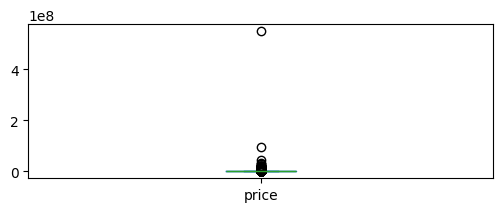

In [121]:
df['price'].plot(kind='box', figsize=(6,2))


In [122]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower) & (df['price'] <= upper)]


In [123]:
df['price'].describe()


,price
count,3.456300e+04
mean,5.662669e+05
std,3.519425e+05
min,1.196300e+04
25%,3.000000e+05
50%,4.940000e+05
75%,7.500000e+05
max,1.657000e+06


In [124]:
df['price_log'] = np.log1p(df['price'])


In [125]:
num_cols = df.select_dtypes(include=np.number)

corr = num_cols.corr()['price_log'].sort_values(ascending=False)
corr.head(15)


,price_log
price_log,1.000000
dynx_totalvalue_y,0.925976
dynx_totalvalue_x,0.925968
price,0.925967
model_year,0.701704
myear,0.701704
model_year_new,0.701704
dynx_itemid2_x,0.429128
centralVariantId,0.429128
dynx_itemid2_y,0.428822


In [126]:
TARGET = 'price_log'

In [127]:
num_features = [
    'km',
    'model_year',
    'Displacement'
]

cat_features = [
    'bt',          # body type
    'tt',          # transmission
    'ft',          # fuel type
    'owner_type',
    'brand_new'
]


In [128]:
features = num_features + cat_features
X = df[features]
y = df[TARGET]


In [129]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X[num_features] = num_imputer.fit_transform(X[num_features])
X[cat_features] = cat_imputer.fit_transform(X[cat_features])


/tmp/ipython-input-1003982180.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_features] = num_imputer.fit_transform(X[num_features])
/tmp/ipython-input-1003982180.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_features] = cat_imputer.fit_transform(X[cat_features])


In [130]:
X = pd.get_dummies(X, drop_first=True)


In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [133]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)


LinearRegression()

In [134]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = mlr.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.8427636674184391
RMSE: 0.26753972445436935


In [135]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': mlr.coef_
}).sort_values(by='Coefficient', ascending=False)

coeff_df.head(10)


,Feature,Coefficient
1,model_year,0.444892
2,Displacement,0.218862
9,bt_SUV,0.186559
10,bt_Sedan,0.093466
34,brand_new_hyundai,0.093218
18,owner_type_first,0.088787
44,brand_new_maruti,0.083432
6,bt_MUV,0.074728
33,brand_new_honda,0.070747
23,brand_new_audi,0.070697


<Axes: xlabel='price_log', ylabel='Count'>

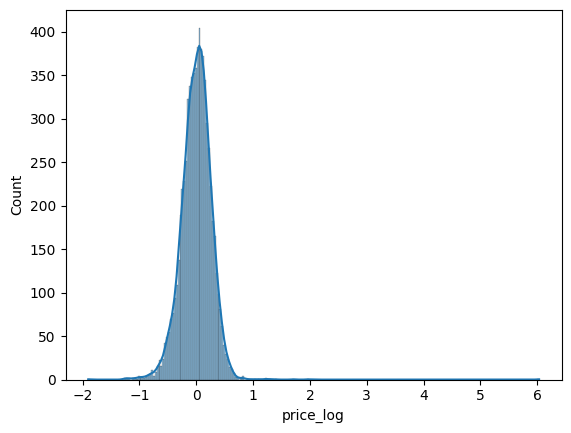

In [136]:
sns.histplot(y_test - y_pred, kde=True)
